<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interval       10 non-null     float64
 1   concentration  10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes
None
   interval  concentration
0       0.5          21.89
1       1.0          35.23
2       1.5          47.13
3       2.0          56.01
4       2.5          61.86


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

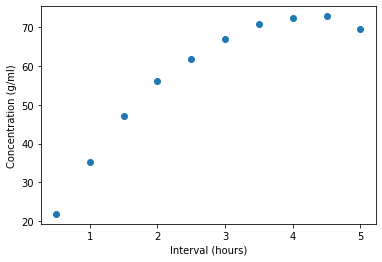

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame({
    'interval': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    'concentration': [21.89, 35.23, 47.13, 56.01, 61.86, 66.95, 70.78, 72.46, 72.81, 69.51]})
print(data.info())
print(data.head())
plt.scatter(data['interval'], data['concentration'])
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()

In [2]:
corr_matrix = data.corr()
print(corr_matrix)

               interval  concentration
interval       1.000000       0.909042
concentration  0.909042       1.000000


Coefficient: [10.51745455]
Intercept: 28.54


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

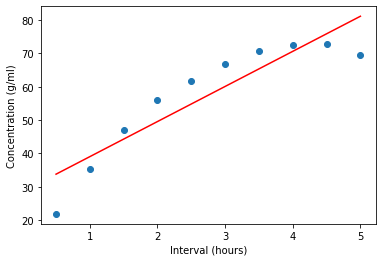

In [3]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
X = data[['interval']]
y = data['concentration']
reg = LinearRegression().fit(X, y)
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interval', ylabel='concentration'>

Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Residuals')

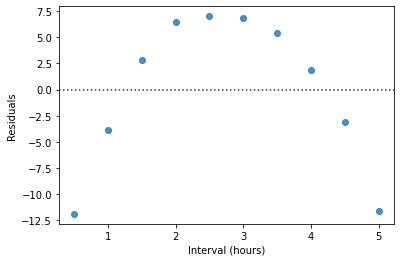

In [4]:
residuals = y - reg.predict(X)
sns.residplot(X, residuals)
plt.xlabel('Interval (hours)')
plt.ylabel('Residuals')
plt.show()

        3         2
0.1063 x - 4.676 x + 33.43 x + 6.506


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

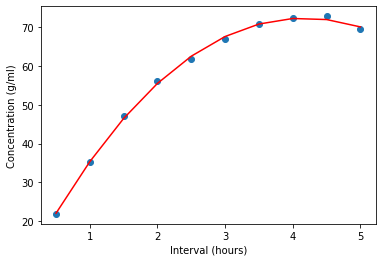

In [5]:
# 使用多项式特征进行多项式回归拟合
poly_features = np.polyfit(X['interval'], y, 3)
poly_reg = np.poly1d(poly_features)
print(poly_reg)
plt.scatter(X, y)
plt.plot(X, poly_reg(X), color='red')
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()

In [6]:
import sympy as sp
# 得到多项式回归模型的方程系数
coeffs = poly_features[:-1]  # 非常数项
intercept = poly_features[-1]  # 常数项
# print(coeffs,intercept)
# 定义符号变量
x = sp.symbols('x')
# 构建多项式回归模型的方程
equation = intercept
for i in range(len(coeffs)-1,-1,-1):
    equation += coeffs[i] * (x ** (len(coeffs)-i))
# print(equation)
# 求解方程的导数，找到最大值点
equation_derivative = sp.diff(equation, x)
max_time = sp.solve(equation_derivative, x)
print("最佳服药时间为:", max_time[0])

最佳服药时间为: 4.16740939497293


In [7]:
target_10 = 10
equation_10 = poly_reg - target_10
root = equation_10.r
print('Interval for concentration of 10:', root)

Interval for concentration of 10: [35.02784292  8.84424153  0.10606521]


In [8]:
target_20 = 20
equation_20 = poly_reg - target_20
root2 = equation_20.r
print('Interval for concentration of 20:', root2)


Interval for concentration of 20: [35.1300027   8.4190513   0.42909566]


In [9]:
interval = (root[0] + root2[0]) / 2
print('Recommended interval:', interval)

Recommended interval: 35.07892281382543


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interval       10 non-null     float64
 1   concentration  10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes
None
   interval  concentration
0       0.5          21.89
1       1.0          35.23
2       1.5          47.13
3       2.0          56.01
4       2.5          61.86


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

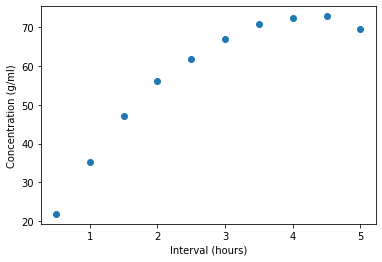

               interval  concentration
interval       1.000000       0.909042
concentration  0.909042       1.000000
Coefficient: [10.51745455]
Intercept: 28.54


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

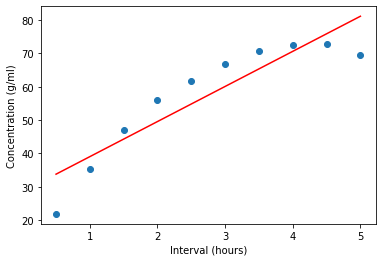

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interval', ylabel='concentration'>

Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Residuals')

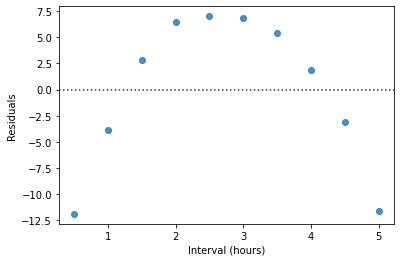

        3         2
0.1063 x - 4.676 x + 33.43 x + 6.506


Text(0.5, 0, 'Interval (hours)')

Text(0, 0.5, 'Concentration (g/ml)')

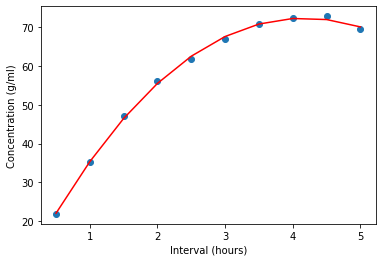

最佳服药时间为: 4.16740939497293
Interval for concentration of 10: [35.02784292  8.84424153  0.10606521]
Interval for concentration of 20: [35.1300027   8.4190513   0.42909566]
Recommended interval: 35.07892281382543


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sympy as sp
# 1. 读取数据，查看数据的基本情况（info()、head()），并绘制相应的图（散点图）
data = pd.DataFrame({
    'interval': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    'concentration': [21.89, 35.23, 47.13, 56.01, 61.86, 66.95, 70.78, 72.46, 72.81, 69.51]})
print(data.info())
print(data.head())
plt.scatter(data['interval'], data['concentration'])
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()
# 2. 对变量进行相关性分析。
corr_matrix = data.corr()
print(corr_matrix)
# 3. 建立简单的一元线性回归并求解，绘制拟合图（包括原数据散点和回归直线）。
X = data[['interval']]
y = data['concentration']
reg = LinearRegression().fit(X, y)
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()
# 4. 查看残差情况。
residuals = y - reg.predict(X)
sns.residplot(X, residuals)
plt.xlabel('Interval (hours)')
plt.ylabel('Residuals')
plt.show()
# 5. 建立多项式回归模型并拟合。
poly_features = np.polyfit(X['interval'], y, 3)
poly_reg = np.poly1d(poly_features)
print(poly_reg)
plt.scatter(X, y)
plt.plot(X, poly_reg(X), color='red')
plt.xlabel('Interval (hours)')
plt.ylabel('Concentration (g/ml)')
plt.show()
# 6. 寻找最佳服药时间（可以使用sympy模块进行方程求解）。
import sympy as sp
# 得到多项式回归模型的方程系数
coeffs = poly_features[:-1]  # 非常数项
intercept = poly_features[-1]  # 常数项
# print(coeffs,intercept)
# 定义符号变量
x = sp.symbols('x')
# 构建多项式回归模型的方程
equation = intercept
for i in range(len(coeffs)-1,-1,-1):
    equation += coeffs[i] * (x ** (len(coeffs)-i))
# print(equation)
# 求解方程的导数，找到最大值点
equation_derivative = sp.diff(equation, x)
max_time = sp.solve(equation_derivative, x)
print("最佳服药时间为:", max_time[0])
# 6.1 解出血药浓度为10时的间隔时间。
target_10 = 10
equation_10 = poly_reg - target_10
root = equation_10.r
print('Interval for concentration of 10:', root)
# 6.2 解出血药浓度为20时的间隔时间。
target_20 = 20
equation_20 = poly_reg - target_20
root2 = equation_20.r
print('Interval for concentration of 20:', root2)
# 6.3 确定间隔时间。
interval = (root[0] + root2[0]) / 2
print('Recommended interval:', interval)
